In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import plotnine as p9




In [4]:
data = pd.read_csv('cleanV5.csv').head(400000)
data.head()

,Unnamed: 0,inpatient_beds_used_covid_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,inpatient_beds_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_sum,previous_day_admission_adult_covid_confirmed_7_day_sum
0,767,0.0,0.0,0.0,0.0,0.0,0.0
1,904,0.0,29.0,29.0,84.0,0.0,0.0
2,1206,0.0,59.0,59.0,245.0,0.0,0.0
3,1397,0.0,306.0,306.0,378.0,0.0,0.0
4,1476,0.0,56.0,56.0,245.0,0.0,0.0


In [ ]:
len(data)

381118

In [5]:
data.columns.to_list()

['Unnamed: 0',
 'inpatient_beds_used_covid_7_day_sum',
 'inpatient_beds_used_7_day_sum',
 'all_adult_hospital_inpatient_bed_occupied_7_day_sum',
 'inpatient_beds_7_day_sum',
 'total_patients_hospitalized_confirmed_influenza_7_day_sum',
 'previous_day_admission_adult_covid_confirmed_7_day_sum']

In [6]:
def ifZero(x):
    if x < 0:
        return 0
    return x

In [27]:
features = ['inpatient_beds_used_covid_7_day_sum',
            'inpatient_beds_used_7_day_sum',
            'all_adult_hospital_inpatient_bed_occupied_7_day_sum', 
            'inpatient_beds_7_day_sum', 
            'previous_day_admission_adult_covid_confirmed_7_day_sum',
            ]

In [28]:
sliced = data[features]
sliced

,inpatient_beds_used_covid_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,inpatient_beds_7_day_sum,previous_day_admission_adult_covid_confirmed_7_day_sum
0,0.0,0.0,0.0,0.0,0.0
1,0.0,29.0,29.0,84.0,0.0
2,0.0,59.0,59.0,245.0,0.0
3,0.0,306.0,306.0,378.0,0.0
4,0.0,56.0,56.0,245.0,0.0
...,...,...,...,...,...
381113,324.0,2071.0,2071.0,2147.0,42.0
381114,116.0,621.0,621.0,630.0,13.0
381115,18.0,1265.0,1123.0,2485.0,16.0
381116,23.0,43.0,41.0,91.0,4.0


In [29]:
psliced = sliced.dropna()
psliced= psliced.applymap(lambda x: ifZero(x))
psliced

,inpatient_beds_used_covid_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,inpatient_beds_7_day_sum,previous_day_admission_adult_covid_confirmed_7_day_sum
0,0.0,0.0,0.0,0.0,0.0
1,0.0,29.0,29.0,84.0,0.0
2,0.0,59.0,59.0,245.0,0.0
3,0.0,306.0,306.0,378.0,0.0
4,0.0,56.0,56.0,245.0,0.0
...,...,...,...,...,...
381113,324.0,2071.0,2071.0,2147.0,42.0
381114,116.0,621.0,621.0,630.0,13.0
381115,18.0,1265.0,1123.0,2485.0,16.0
381116,23.0,43.0,41.0,91.0,4.0


In [30]:
len(psliced)

381118

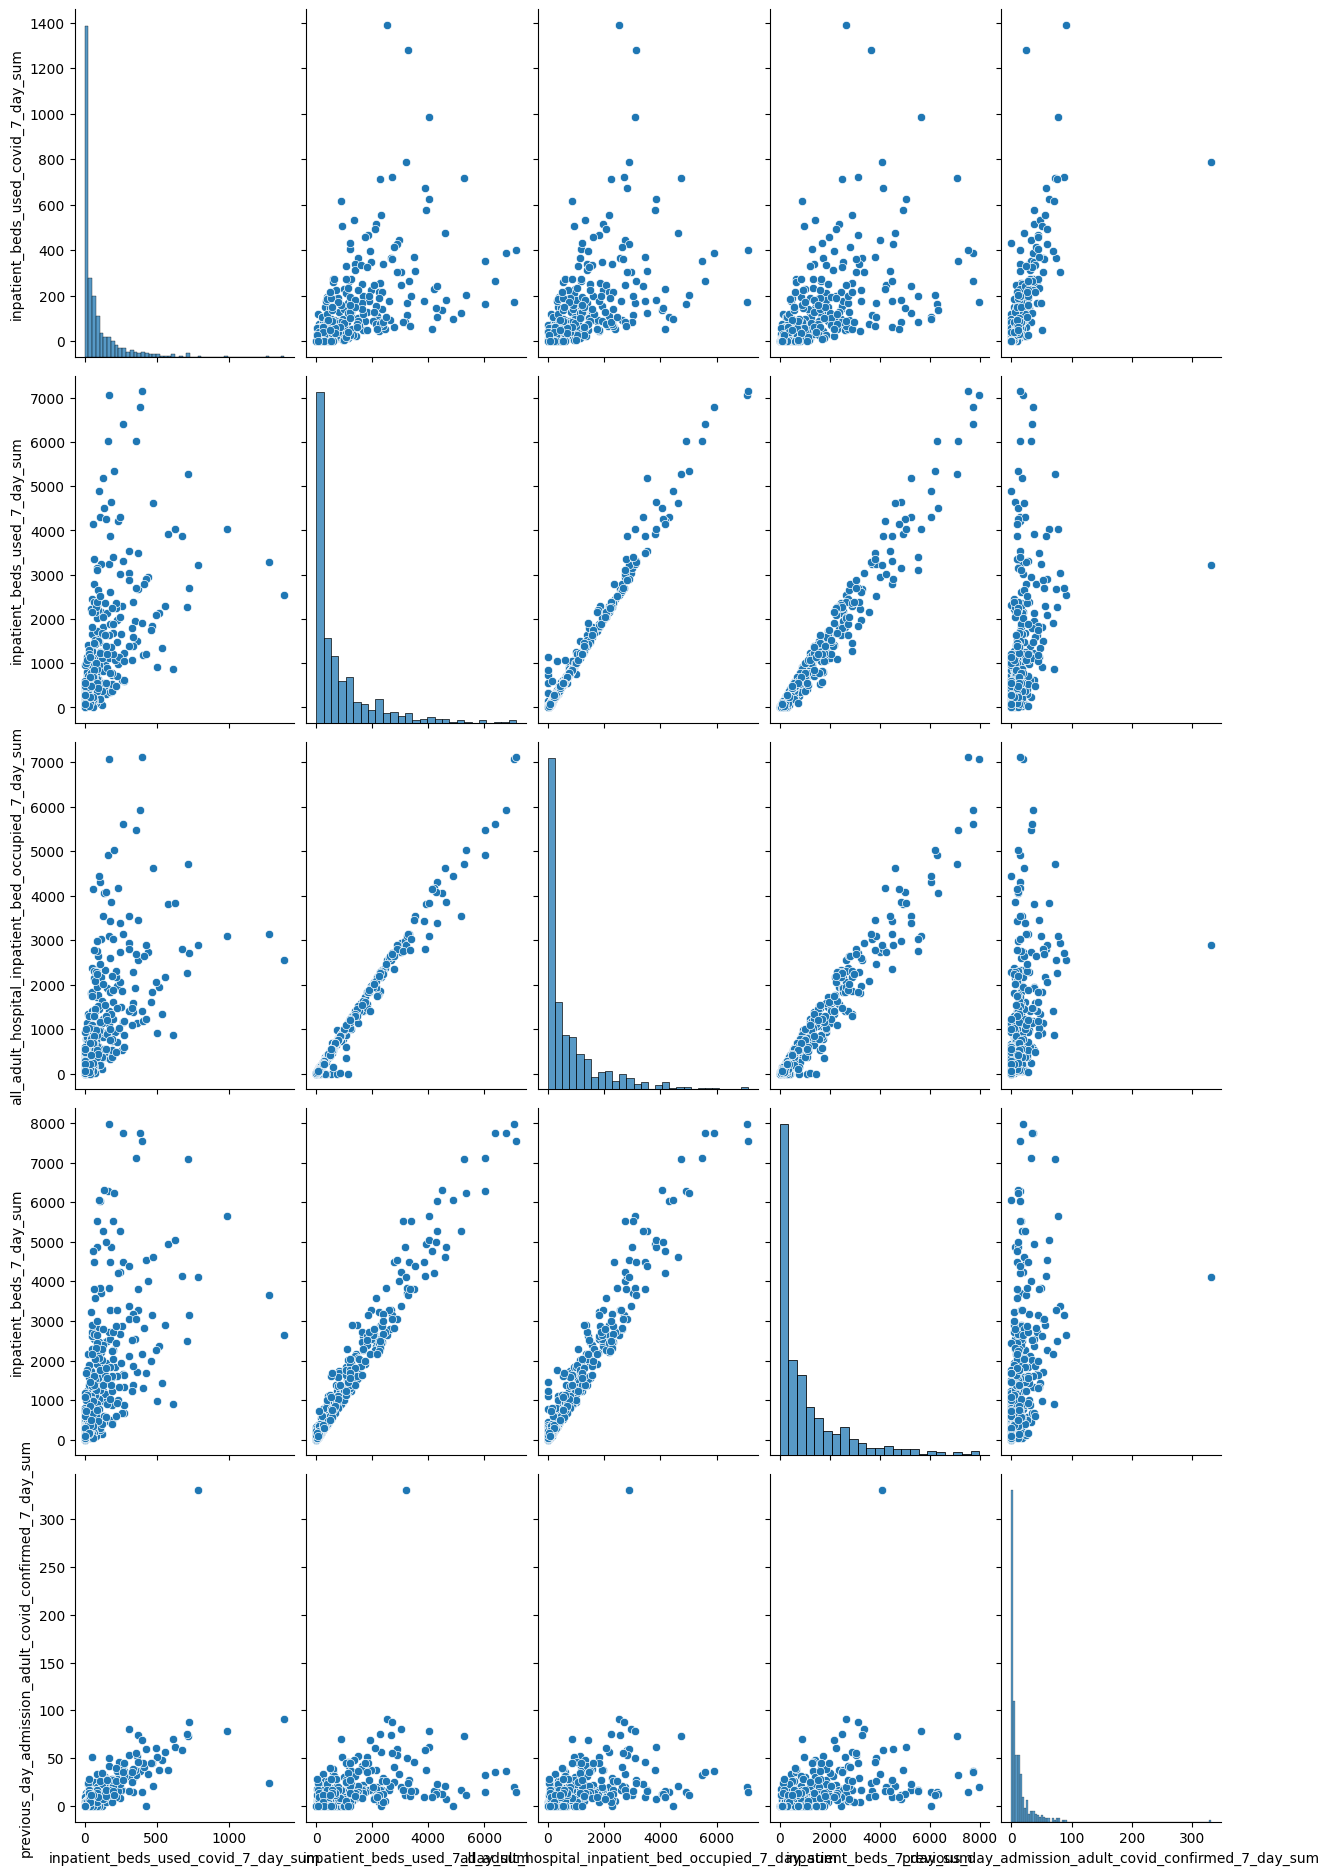

In [22]:
psample = psliced.sample(500, axis=0)
plot = sns.pairplot(data=psample)
plot.fig.subplots_adjust(top=1.5)


Ok so it actually seems like there's 6 possible combinations we can use:
(Format: row vs col)
<br>
This is the best one: 
<br>
inpatient_beds_7_day_sum vs all_adult_hospital_inpatient_bed_occupied_7_day_sum



1) all_adult_hospital_inpatient_bed_occupied_7_day_sum vs inpatient_beds_used_7_day_sum
2) inpatient_beds_7_day_sum vs inpatient_beds_7_day_sum
3) all_adult_hospital_inpatient_bed_occupied_7_day_sum vs inpatient_beds_7_day_sum
4) inpatient_beds_used_7_day_sum vs inpatient_beds_used_7_day_sum
5) inpatient_beds_used_7_day_sum vs all_adult_hospital_inpatient_bed_occupied_7_day_sum

In [23]:
input = psliced['all_adult_hospital_inpatient_bed_occupied_7_day_sum'].values.reshape(-1, 1)
output = psliced['inpatient_beds_used_covid_7_day_sum'].values.reshape(-1, 1)

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(input, output, test_size=0.3, random_state=404)

In [25]:
dtree = DecisionTreeClassifier(random_state=404)
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=404)

In [26]:
y_pred = dtree.predict(xtest)

print("Train data accuracy:",accuracy_score(y_true = ytrain, y_pred = dtree.predict(xtrain)))
print("Test data accuracy:",accuracy_score(y_true = ytest, y_pred = y_pred))

Train data accuracy: 0.36720618332571164
Test data accuracy: 0.3374965015393227


In [33]:
solve = []
for feature in features[1:]:
  input = psliced[feature].values.reshape(-1, 1)
  output = psliced['inpatient_beds_used_covid_7_day_sum'].values.reshape(-1, 1)
  xtrain, xtest, ytrain, ytest = train_test_split(input, output, test_size=0.3, random_state=404)
  dtree = DecisionTreeClassifier(random_state=404)
  dtree.fit(xtrain, ytrain)
  y_pred = dtree.predict(xtest)
  trainAccuracy = accuracy_score(y_true = ytrain, y_pred = dtree.predict(xtrain))
  testAccuracy = accuracy_score(y_true = ytest, y_pred = y_pred)
  print("Train data accuracy:",trainAccuracy)
  print("Test data accuracy:",testAccuracy)
  solve.append({
    'input': input,
    'output': output,
    'xtrain': xtrain,
    'xtest': xtest,
    'ytrain': ytrain,
    'ytest': ytest,
    'dtree': dtree,
    'y_pred': y_pred,
    'trainAccuracy': trainAccuracy,
    'testAccuracy': testAccuracy,
  })
  

Train data accuracy: 0.36993875148998057
Test data accuracy: 0.3374440246291632
Train data accuracy: 0.36720618332571164
Test data accuracy: 0.3374965015393227
Train data accuracy: 0.36920781761887983
Test data accuracy: 0.33809123985446404
Train data accuracy: 0.3460016043061376
Test data accuracy: 0.342000769661349
